In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# The name of our fintech: (on a des points bonus pour le meilleur nom)

In [27]:
training_data = pd.read_csv("PastLoans.csv")
prediction_data = pd.read_csv("NewApplications_Lender2_Round1.csv")

In [11]:
training_data.head()

,sex,employment,married,income,digital1,digital2,digital3,default
0,M,unemployed,0,0,0.749267,0.422656,0.738735,0
1,M,employed,1,26108,0.697428,0.596361,0.733947,0
2,M,employed,1,11810,0.000000,0.652496,0.000000,0
3,M,unemployed,1,0,0.000000,0.000000,0.000000,0
4,F,retired,1,6310,0.000000,0.041123,0.203202,0


In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sex         100000 non-null  object 
 1   employment  100000 non-null  object 
 2   married     100000 non-null  int64  
 3   income      100000 non-null  int64  
 4   digital1    100000 non-null  float64
 5   digital2    100000 non-null  float64
 6   digital3    100000 non-null  float64
 7   default     100000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 6.1+ MB


In [13]:
training_data.describe()

,married,income,digital1,digital2,digital3,default
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.60822,18646.253910,0.417739,0.415741,0.414914,0.099470
std,0.48815,48178.198971,0.325269,0.325093,0.325064,0.299294
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,5385.000000,0.064623,0.062594,0.060467,0.000000
50%,1.00000,9370.000000,0.448209,0.444645,0.440936,0.000000
75%,1.00000,17474.250000,0.696019,0.694762,0.692441,0.000000
max,1.00000,1000000.000000,0.999975,0.999986,0.999965,1.000000


# Model to predict default

In [30]:
X = training_data.drop(['default', 'digital1', 'digital3'], axis=1)
y = training_data['default']

X = pd.get_dummies(X, columns=['sex', 'employment'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - accuracy: 0.8721 - loss: 26.6148 - val_accuracy: 0.9032 - val_loss: 10.3455
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.8652 - loss: 10.7130 - val_accuracy: 0.9032 - val_loss: 20.2697
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step - accuracy: 0.8543 - loss: 6.0445 - val_accuracy: 0.9031 - val_loss: 3.2666
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.8586 - loss: 9.6365 - val_accuracy: 0.8774 - val_loss: 0.5491
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.8538 - loss: 4.0029 - val_accuracy: 0.9018 - val_loss: 0.9944
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 259us/step - accuracy: 0.8581 - loss: 1.4699 - val_accuracy: 0.9025 - val_loss: 0.3377
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.8968 - loss: 0.3451 - val_accuracy: 0.9029 - val_loss: 0.3101
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.8994 - loss: 

In [34]:
# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

# XGBoost Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

# Neural Network Evaluation
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network:\n", classification_report(y_test, y_pred_nn))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     18049
           1       0.00      0.00      0.00      1951

    accuracy                           0.90     20000
   macro avg       0.45      0.50      0.47     20000
weighted avg       0.81      0.90      0.86     20000

XGBoost:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     18049
           1       1.00      0.00      0.00      1951

    accuracy                           0.90     20000
   macro avg       0.95      0.50      0.48     20000
weighted avg       0.91      0.90      0.86     20000

194/625 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
Neural Network:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     18049
           1       0.00      0.00      0.00      1951

    accuracy                           0.90     20000
   macro avg       0.45      0.50      0.47     20000
weighted avg       0.81      0.90      0.86     20000



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predicting default of clients

In [35]:
prediction_data.head()

,id,sex,employment,married,income,digital2
0,1,M,employed,0,29758,0.000000
1,2,F,retired,1,6140,0.000000
2,3,F,employed,1,27186,0.008139
3,4,M,employed,1,8429,0.624570
4,5,M,retired,1,2820,0.097230


In [43]:
prediction_data_transformed = pd.get_dummies(prediction_data, columns=['sex', 'employment'], drop_first=True)
prediction_data_transformed = prediction_data_transformed.drop('id', axis=1)

In [44]:
prediction_data_transformed

,married,income,digital2,sex_M,employment_retired,employment_student,employment_unemployed
0,0,29758,0.000000,True,False,False,False
1,1,6140,0.000000,False,True,False,False
2,1,27186,0.008139,False,False,False,False
3,1,8429,0.624570,True,False,False,False
4,1,2820,0.097230,True,True,False,False
...,...,...,...,...,...,...,...
99995,1,9027,0.070968,True,True,False,False
99996,0,6229,0.635176,True,False,True,False
99997,1,6471,0.748987,True,False,False,False
99998,0,32654,0.000000,True,False,False,True


In [45]:
y_prob_log_reg = log_reg.predict_proba(prediction_data_transformed)[:, 1]
y_prob_xgb = xgb_model.predict_proba(prediction_data_transformed)[:, 1]
y_prob_nn = nn_model.predict(prediction_data_transformed).flatten()

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 179us/step


# Calculate interest rate

$ r_i = \frac{PD_i}{1 - PD_i} $

In [47]:
def calculate_interest_rate(probabilities):
    return probabilities / (1 - probabilities)

interest_rates_log_reg = calculate_interest_rate(y_prob_log_reg)
interest_rates_xgb = calculate_interest_rate(y_prob_xgb)
interest_rates_nn = calculate_interest_rate(y_prob_nn)

In [48]:
margin = 0.02  # Example margin of 2%
final_interest_rates_log_reg = interest_rates_log_reg + margin
final_interest_rates_xgb = interest_rates_xgb + margin
final_interest_rates_nn = interest_rates_nn + margin

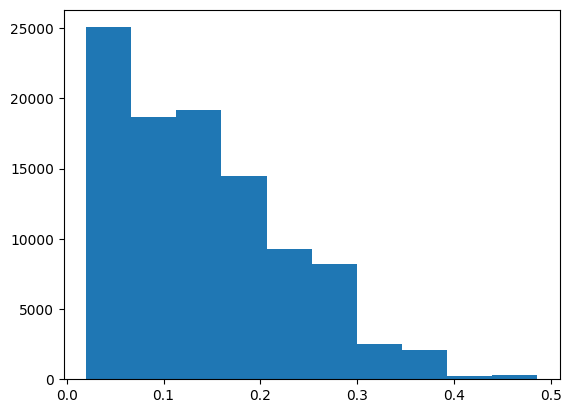

In [55]:
plt.hist(final_interest_rates_log_reg)
plt.show()